## Premier League Match Analysis (Capstone Project)
# Introduction

This project looks at match data from the Premier League 2024/2025 season.
The main aim of this project is to understand team performance and match results using data. We focus only on the Premier League.
The analysis is done step by step using Python. Before each part of the analysis, there is a short explanation of what is being done. After each graph, the main insight is clearly explained.


## Dataset Overview
The dataset contains match-level information from the Premier League.
Each row represents one match, and includes:
Home team
Away team
Goals score
Match result
Points awarded
The dataset is well structured and suitable for analysis without heavy cleaning.

## Importing Libraries and Loading the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('football_matches_2024_2025.csv')

## Filter Premier League Matches Only

The dataset includes matches from multiple competitions.
Since this project focuses only on the Premier League, we filter the dataset to include Premier League matches only.
This ensures that all analysis is relevant to the main project question.

In [29]:
df = df[df['competition_name'] == 'Premier League']

## Data Inspection and Quality Check

Before analysing the data, we check its structure and quality. This helps us understand what the dataset looks like and whether there are any missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   competition_code  1941 non-null   object
 1   competition_name  1941 non-null   object
 2   season            1941 non-null   object
 3   match_id          1941 non-null   int64 
 4   matchday          1941 non-null   int64 
 5   stage             1941 non-null   object
 6   status            1941 non-null   object
 7   date_utc          1941 non-null   object
 8   referee           1941 non-null   object
 9   home_team_id      1941 non-null   int64 
 10  home_team         1941 non-null   object
 11  away_team_id      1941 non-null   int64 
 12  away_team         1941 non-null   object
 13  fulltime_home     1941 non-null   int64 
 14  fulltime_away     1941 non-null   int64 
 15  halftime_home     1941 non-null   int64 
 16  halftime_away     1941 non-null   int64 
 17  goal_differenc

In [11]:
df.columns

Index(['competition_code', 'competition_name', 'season', 'match_id',
       'matchday', 'stage', 'status', 'date_utc', 'referee', 'home_team_id',
       'home_team', 'away_team_id', 'away_team', 'fulltime_home',
       'fulltime_away', 'halftime_home', 'halftime_away', 'goal_difference',
       'total_goals', 'match_outcome', 'home_points', 'away_points',
       'referee_id'],
      dtype='object')

In [12]:
df.head(11)

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,referee_id
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0,0,1,1,Home Win,3,0,1
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0,0,-2,2,Away Win,0,3,2
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1,0,2,2,Home Win,3,0,3
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0,1,-3,3,Away Win,0,3,4
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1,0,1,1,Home Win,3,0,5
5,PL,Premier League,2024/2025,497415,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Michael Oliver,351,...,1,1,1,0,0,2,Draw,1,1,6
6,PL,Premier League,2024/2025,497416,1,REGULAR_SEASON,FINISHED,2024-08-17 16:30:00+00:00,Tony Harrington,563,...,1,2,1,1,-1,3,Away Win,0,3,7
7,PL,Premier League,2024/2025,497417,1,REGULAR_SEASON,FINISHED,2024-08-18 13:00:00+00:00,Sam Barrott,402,...,2,1,1,0,1,3,Home Win,3,0,8
8,PL,Premier League,2024/2025,497418,1,REGULAR_SEASON,FINISHED,2024-08-18 15:30:00+00:00,Anthony Taylor,61,...,0,2,0,1,-2,2,Away Win,0,3,9
9,PL,Premier League,2024/2025,497419,1,REGULAR_SEASON,FINISHED,2024-08-19 19:00:00+00:00,Chris Kavanagh,338,...,1,1,0,1,0,2,Draw,1,1,10


In [13]:
df.duplicated().sum() 

np.int64(0)

In [14]:
df.isnull().sum()

competition_code    0
competition_name    0
season              0
match_id            0
matchday            0
stage               0
status              0
date_utc            0
referee             0
home_team_id        0
home_team           0
away_team_id        0
away_team           0
fulltime_home       0
fulltime_away       0
halftime_home       0
halftime_away       0
goal_difference     0
total_goals         0
match_outcome       0
home_points         0
away_points         0
referee_id          0
dtype: int64

## Insight
The dataset is complete and well organised. There are no major missing values, so the data can be used directly for analysis.

## Match Outcomes in the Premier League
This step analyses how Premier League matches end.
We look at home wins, away wins, and draws to understand general match outcome patterns.

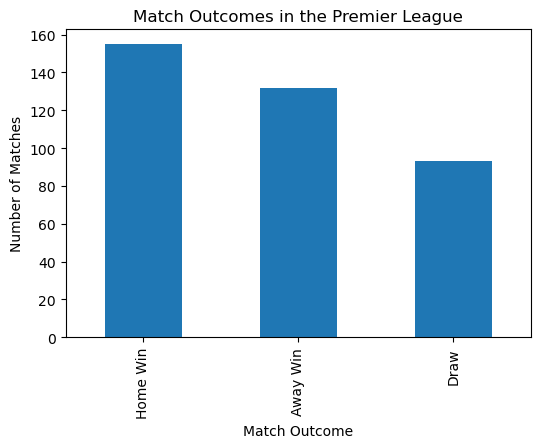

In [31]:
result_counts = df['match_outcome'].value_counts()


result_counts.plot(kind='bar', figsize=(6, 4))
plt.title('Match Outcomes in the Premier League')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.show()


## Insight

Home wins are the most common result in the Premier League.
This suggests that playing at home provides a clear advantage.
Draws occur less often but still play an important role in the league.

## Total Goals per Match

This step focuses on how many goals are scored in Premier League matches.
We analyse the distribution of total goals to understand how attacking the league is.

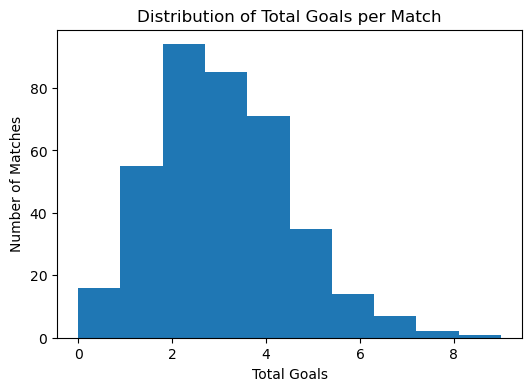

In [32]:
df['total_goals'].plot(kind='hist', bins=10, figsize=(6, 4))
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Number of Matches')
plt.show()

## Insight

Most Premier League matches have between 2 and 4 goals.
This shows that the league is competitive and generally high-scoring.

## Top Premier League Teams by Total Points

In this step, we calculate the total points earned by each Premier League team
Both home and away points are combined to show overall team performance.

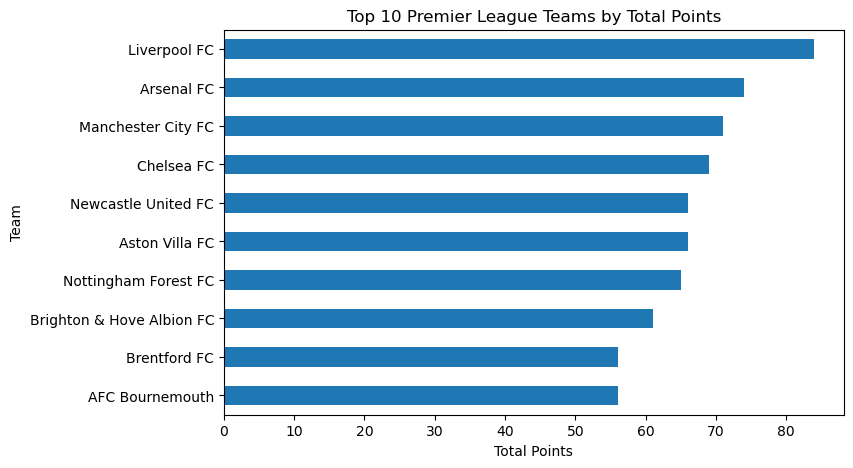

In [33]:
home_points = df.groupby('home_team')['home_points'].sum()
away_points = df.groupby('away_team')['away_points'].sum()

total_points = home_points.add(away_points, fill_value=0)


top_teams = total_points.sort_values(ascending=False).head(10)

top_teams.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title('Top 10 Premier League Teams by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.show()


## Insight

A small group of teams collect significantly more points than others.
This highlights the performance gap between top clubs and lower-ranked teams.

## Home vs Away Goals

This step compares goals scored by home teams and away teams.
It helps us understand whether teams perform better when playing at home.

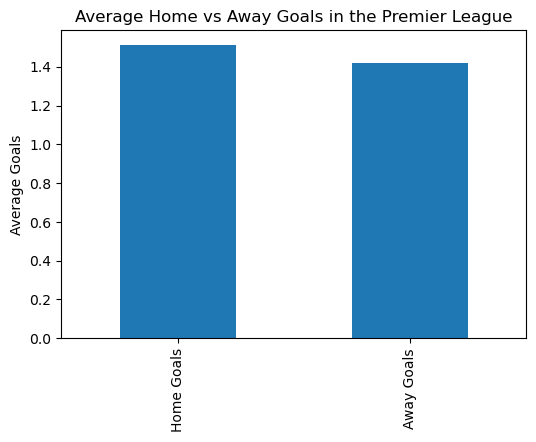

In [34]:
home_goals_avg = df['fulltime_home'].mean()
away_goals_avg = df['fulltime_away'].mean()

goals_comparison = pd.Series(
    [home_goals_avg, away_goals_avg],
    index=['Home Goals', 'Away Goals']
)

goals_comparison.plot(kind='bar', figsize=(6, 4))
plt.title('Average Home vs Away Goals in the Premier League')
plt.ylabel('Average Goals')
plt.show()


## Insight

Home teams score more goals on average than away teams.
This supports the idea of home advantage in the Premier League.

## Goal Difference by Match Outcome

In this step, we analyse how goal difference changes depending on the match outcome.
This helps us understand whether wins are usually close games or clear victories.

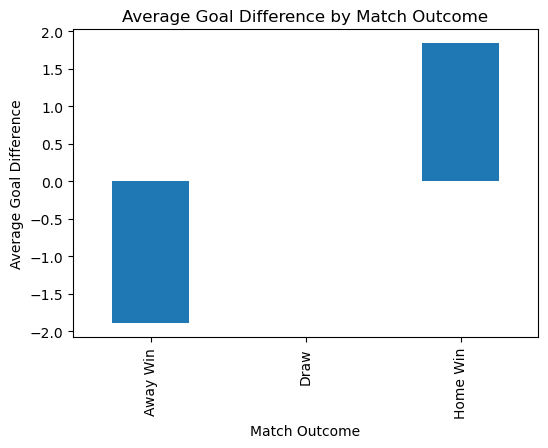

In [35]:
goal_diff_outcome = df.groupby('match_outcome')['goal_difference'].mean()

goal_diff_outcome.plot(kind='bar', figsize=(6, 4))
plt.title('Average Goal Difference by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Average Goal Difference')
plt.show()


## Insight

Winning teams usually have a positive goal difference, while losing teams have a negative one.
Draws naturally have a goal difference close to zero.
This confirms that goal difference strongly reflects match results.

## Home vs Away Points

This step compares the average points gained by teams when playing at home and away.
It helps us measure the impact of home advantage in terms of points earned.

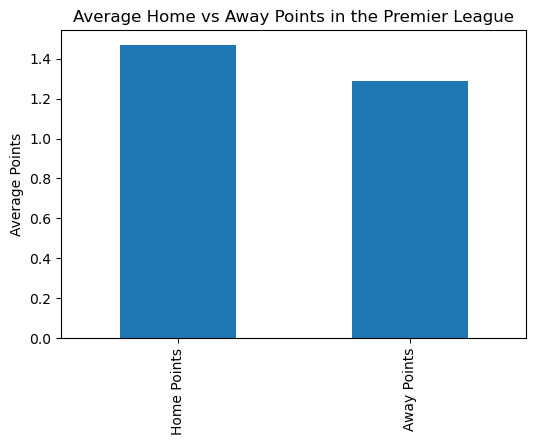

In [36]:
avg_home_points = df['home_points'].mean()
avg_away_points = df['away_points'].mean()

points_comparison = pd.Series(
    [avg_home_points, avg_away_points],
    index=['Home Points', 'Away Points']
)

points_comparison.plot(kind='bar', figsize=(6, 4))
plt.title('Average Home vs Away Points in the Premier League')
plt.ylabel('Average Points')
plt.show()


## Insight

Teams earn more points on average when playing at home.
This further confirms the importance of home advantage in the Premier League.

## Machine Learning Predict Match Outcome (Logistic Regression)

In this step, we build a simple machine learning model to predict match outcomes.
The model uses:

Home goals

Away goals

The goal is not perfect accuracy, but to demonstrate basic machine learning skills.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df[['fulltime_home', 'fulltime_away']]
y = df['match_outcome']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

## Insight

The model achieves a reasonable accuracy using only goal data.
This shows that goals scored are strongly linked to match outcomes.
The purpose of this model is to demonstrate machine learning understanding, not to create a perfect predictor.

## Machine Learning Predict Total Goals (Linear Regression)

Predicting Total Goals
In this step, we use a simple regression model to predict the total number of goals in a match.
The model uses home and away goals as input features.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['fulltime_home', 'fulltime_away']]
y = df['total_goals']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


y_pred = reg_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mse


4.644937566926352e-31

## Insight

The model predicts total goals with reasonable error.
This confirms that home and away goals are good indicators of overall match scoring.
This model demonstrates basic regression skills using football data.

## Final Summary

This capstone project analysed Premier League football matches using Python and data analytics techniques.

Key findings include:
Home advantage plays a major role in goals, points, and match outcomes
Top teams consistently outperform others across the season
Goal data is highly predictive of match outcomes
Simple machine learning models were applied to demonstrate predictive analysis skills.
Overall, this project shows how data analytics can be used to gain insights into real-world football performance.